<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/examples/unsupervised/vanilla_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class Encoder(layers.Layer):
  def __init__(self, hidden_dim):  
    super(Encoder, self).__init__()
    self.hidden_layer = layers.Dense(units=hidden_dim, activation=tf.nn.relu)
  def call(self, x):
    x = self.hidden_layer(x)
    return x

In [0]:
class Decoder(layers.Layer):
  def __init__(self, data_dim):
    super(Decoder, self).__init__()
    self.output_layer = layers.Dense(units=data_dim, activation=tf.nn.relu)
  def call(self, x):
    x = self.output_layer(x)
    return x

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, data_dim, hidden_dim):
    super(Autoencoder, self).__init__()
    self.encoder = Encoder(hidden_dim)
    self.decoder = Decoder(data_dim)
  def call(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [6]:
(X_train, Y_train), (X_test, Y_test) =  tf.keras.datasets.mnist.load_data()
X_train = X_train/ 255
X_test = X_test/ 255
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2])).astype(np.float32)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2])).astype(np.float32)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
autoencoder = Autoencoder(X_train.shape[1], 100)

In [0]:
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
autoencoder.build(X_train.shape)
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Encoder)            multiple                  78500     
_________________________________________________________________
decoder (Decoder)            multiple                  79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0274
Epoch 2/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0103
Epoch 3/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0086
Epoch 4/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0078
Epoch 5/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0074
Epoch 6/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0071
Epoch 7/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0070
Epoch 8/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0068
Epoch 9/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0068
Epoch 10/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0067
Epoch 11/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0067
Epoch 1

In [0]:
X_decoded = autoencoder.predict(X_test)

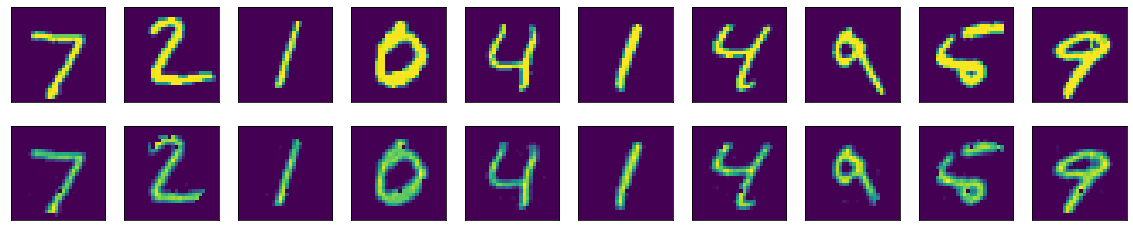

In [12]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='viridis')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_decoded[i].reshape(28, 28), cmap='viridis')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()